# Kryptography Advertising Campaign

### a. Specifying the data analysis question.

Examine the different factors that determine the success of an advertising campaign

### b. Defining the metric of success
For this project to be a success, I will:

*   Provide a statistical analysis of the different variables including measures of central tendency and dispersion.
*   Identify the most important factors in determining whether a person will click an ad.
*   Provide actionable recommendations to improve the success of the marketing campaign.






### c. Understanding the context
It is undeniable that the cost of running a business is not cheap and a significant contributing factor for most companies is the cost of advertising/ marketing. Comapnies spend huge sums of money in several advertising campaigns throught out the finanacial year but of concern is that very little of the said campaigns offer meaningful value for money. A common shortfall of many advertsing teams is the failure to develop a proper understanding of the market dynamics which would then enable them to make appropriate measures to widen the reach of the advertisement/ marketing campaign and increase its success rate. 

This project entails an analysis of a previous advertising campaign with a view of helping a 'Kenyan' cryptographer to optimize their advertising campaign. Although the scope of the project only entails data analysis, it can be extend to build a model that predicts whether or not a person will click on an advertisment.


### d. Recording the experimental design


*   Load and preview the data set
*   Clean the data set 
*   Check for anomalies and outliers
*   Compute the measures of central tendency for the numeric variables (mean, mode, median) 
*   Compute measures of dispersion such as standard deviation, skewness, and kurtosis
*   Compute the correlation between the dependent and independent variables
*   Plot univariate and bivariate graphs for appropriate variables.
*   Summarize and present findings













## 1. Reading and Previewing the Data

In [ ]:
library(readr) # to read csv file

advertising <- read_csv('advertising.csv')
head(advertising) # preview first 6 rows

Parsed with column specification:
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)



Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
library(tibble)
glimpse(advertising) # to get summary information about the dataset

Rows: 1,000
Columns: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, …
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49…
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73…
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22…
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "Mon…
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", "W…
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, …
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy",…
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,…
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, …


Using the glimpse function, we can observe the dataframes dimensions, column names, data types, and a preview of the data contained in each row. From the preview, we observe that there are:
1000 rows
10 columns
1 column of date time data type
6 columns of numeric data type
3 columns of character data type

NB: 'Male' and 'Clicked on Ad' are encoded columns 

## Cleaning the data

In [ ]:
# rename column names 
colnames(advertising) <- list('Daily_Time', 'Age', 'Area_Income', 'Daily_Internet', 'Ad_Topic', 'City', 'Male', 'Country', 'Timestamp', 'Clicked')
colnames(advertising)

[1] "Daily_Time"     "Age"            "Area_Income"    "Daily_Internet"
 [5] "Ad_Topic"       "City"           "Male"           "Country"       
 [9] "Timestamp"      "Clicked"

All columns were correctly renamed.

In [ ]:
# checking for missing values
colSums(is.na(advertising)) 

Daily_Time            Age    Area_Income Daily_Internet       Ad_Topic 
             0              0              0              0              0 
          City           Male        Country      Timestamp        Clicked 
             0              0              0              0              0

There are no missing values in the data set.

In [ ]:
# checking for duplicates
duplicates <- advertising[duplicated(advertising),] 
nrow(duplicates)

[1] 0

There are no duplicates in the data set.


In [ ]:
library(lubridate)
library(tidyverse)

new_advertising <- advertising %>% mutate(
  Day = wday(Timestamp, label=F)
)
head(new_advertising)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



Daily_Time,Age,Area_Income,Daily_Internet,Ad_Topic,City,Male,Country,Timestamp,Clicked,Day
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,5


In [ ]:
# checking outliers in the numeric columns
# assign numeric columns to variables
daily_internet <- new_advertising$Daily_Internet
area_income <- new_advertising$Area_Income
daily_time <- new_advertising$Daily_Time
age <- new_advertising$Age

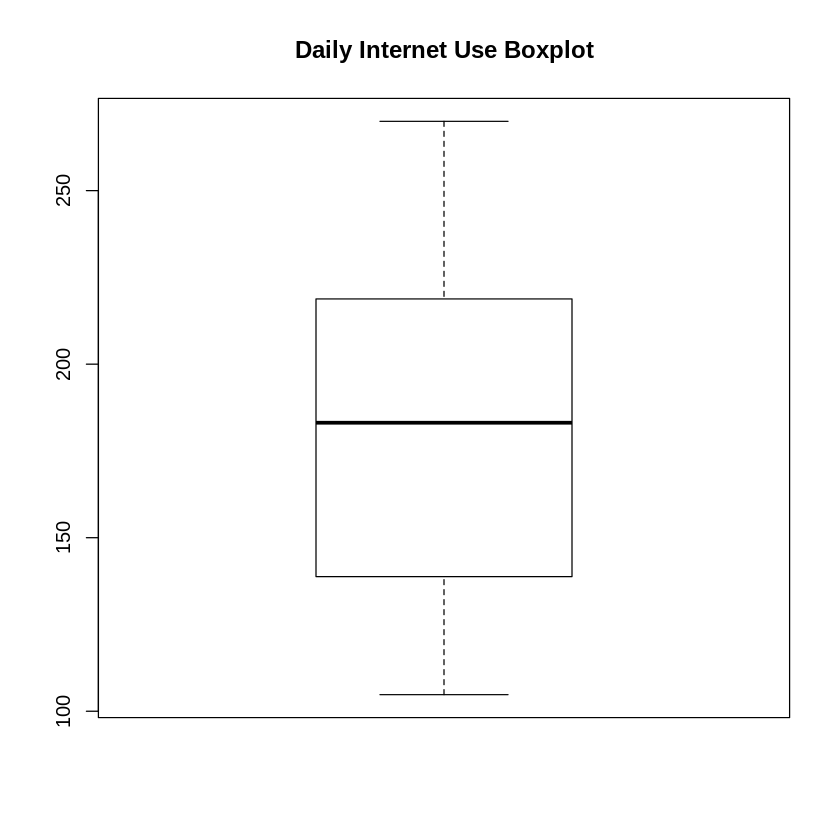

In [ ]:
# checking outliers in daily internet usage
boxplot(daily_internet, main='Daily Internet Use Boxplot')

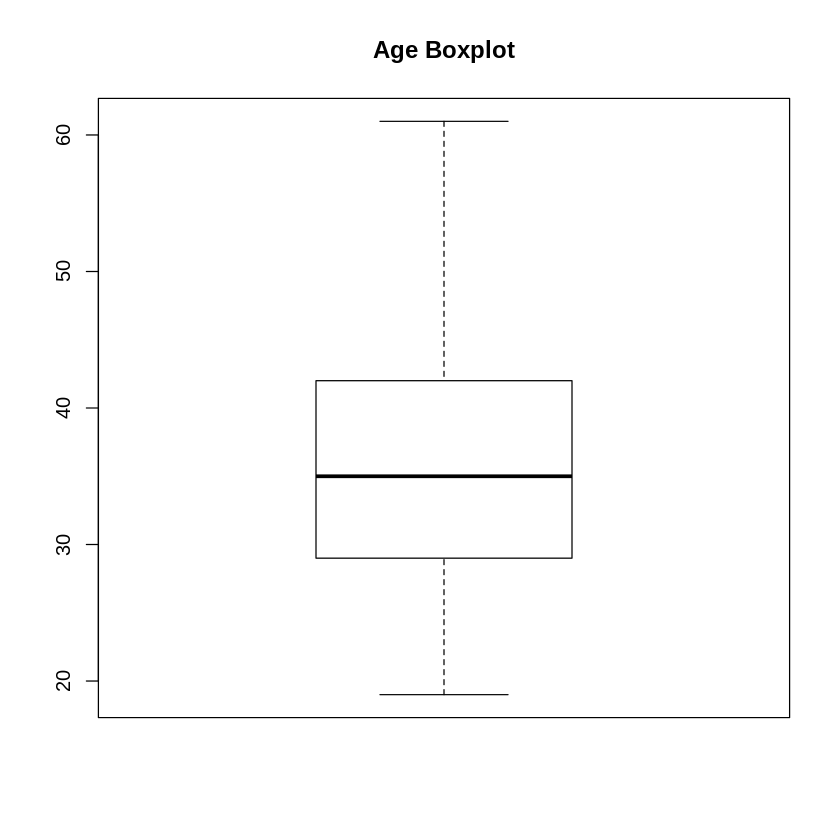

In [ ]:
# checking outliers in age
boxplot(age, main='Age Boxplot')

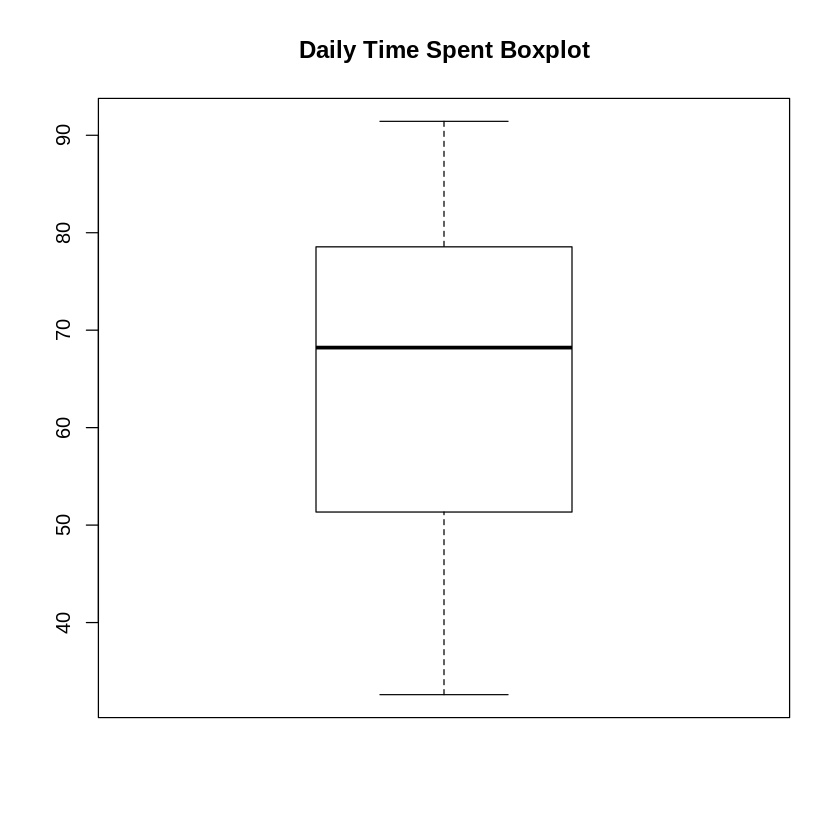

In [ ]:
# checking outliers in the amount of time spent daily
boxplot(daily_time, main='Daily Time Spent Boxplot')

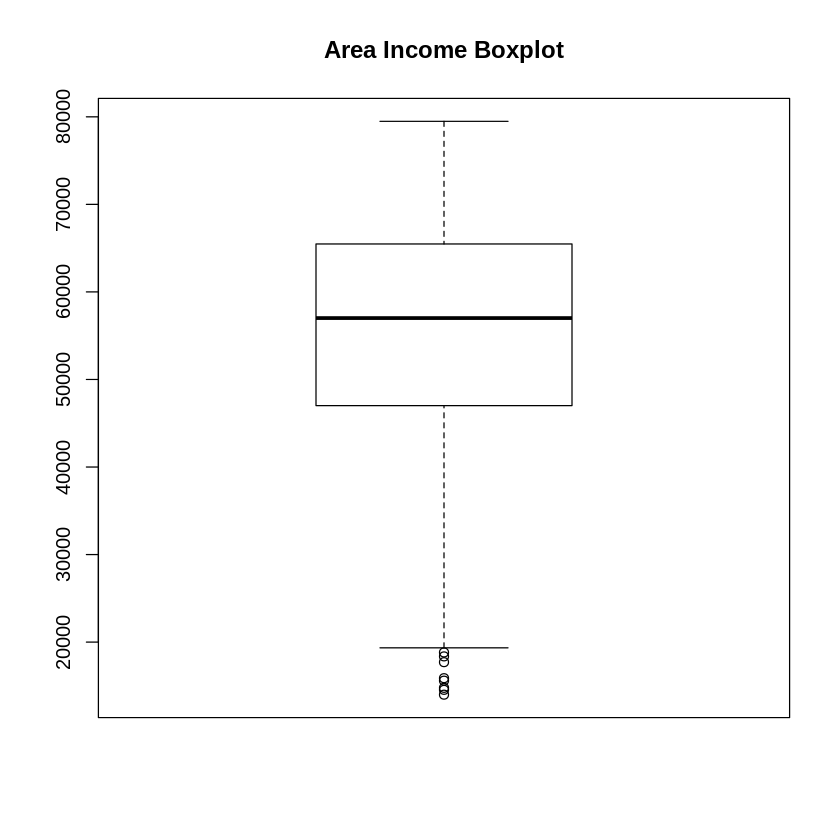

In [ ]:
# checking outliers in area income
boxplot(area_income, main='Area Income Boxplot')

From all the numeric variables, outliers were only evident in the area income as seen in the boxplots. Before removing the outliers, I will explore the outlier values to determine a minimum and maximum threshold value with which to exclude the outliers.


In [ ]:
# examine the outlier values
boxplot.stats(area_income)$out 

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

Since all outliers are on the lower end, we can set a threshold value of 19,000 since the largest outlier is 18,819. I will drop the rows with outliers using the filter function.

In [ ]:
# filter rows with outliers
advertising_no_outliers <- filter(new_advertising, Area_Income > 19000)

# confirm outliers were dropped using dimensions
nrow(new_advertising)
nrow(advertising_no_outliers)

[1] 1000

[1] 992

Eight rows were removed which corresponds to the number of outliers that were in the data set.

## Univariate Analysis

In [ ]:
library(tidyverse)
# select the numeric columns 
numeric_cols <- advertising_no_outliers %>% select('Daily_Time', 'Age', 'Area_Income', 'Daily_Internet')

In [ ]:
install.packages("data.table") # install package data.table to work with data tables
library(data.table)

numeric_cols <- data.table(numeric_cols) # convert selected columns to a data table

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




In [ ]:
# check means for numeric columns
numeric_cols[,lapply(.SD, mean)]

Daily_Time,Age,Area_Income,Daily_Internet
<dbl>,<dbl>,<dbl>,<dbl>
65.03979,35.98286,55312.81,179.985


We can observe that the average time that the sample group spend on the internet is 65 minutes. The average age of the sample was 36 years with an average area income of 55,000. Additionally, the average person utilized 180 megabytes of data. 

In [ ]:
# check medians for numeric columns
numeric_cols[,lapply(.SD, median)]

Daily_Time,Age,Area_Income,Daily_Internet
<dbl>,<dbl>,<dbl>,<dbl>
68.39,35,57228.18,183.425


We can observe that the median time spent online is 68 minutes, the median age is 35 years, the median area income is 57,228 and 183.4 megabytes.

In [ ]:
# define a function to check the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

numeric_cols[,lapply(.SD, getmode)]

Daily_Time,Age,Area_Income,Daily_Internet
<dbl>,<dbl>,<dbl>,<dbl>
62.26,31,61833.9,167.22


In [ ]:
# check standard deviation of numeric columns
numeric_cols[,lapply(.SD, sd)]

Daily_Time,Age,Area_Income,Daily_Internet
<dbl>,<dbl>,<dbl>,<dbl>
15.9016,8.800784,13005.29,44.03163


The standard deviation defines how much the points differ from the mean. From the sample the standard deviation for the daily time spent is 15 minutes, age is 8.8 years, the standard deviation of area income is 13005 while the daily internet is 44 megabytes.

In [ ]:
# check variance of numeric columns
numeric_cols[,lapply(.SD, var)]

Daily_Time,Age,Area_Income,Daily_Internet
<dbl>,<dbl>,<dbl>,<dbl>
252.8609,77.45379,169137582,1938.785


The variance is a square of the standard deviation.

In [ ]:
# check quantiles for numeric columns
quantiles <- numeric_cols[,lapply(.SD, quantile)]
quantile_range = list('min',25,50,75,'max')
rownames(quantiles) <- quantile_range
quantiles

,Daily_Time,Age,Area_Income,Daily_Internet
,<dbl>,<dbl>,<dbl>,<dbl>
min,32.600,19,19345.36,104.7800
25,51.285,29,47332.82,138.6475
50,68.390,35,57228.18,183.4250
75,78.585,42,65518.96,218.8425
max,91.430,61,79484.80,269.9600


The minimum values, quantiles, and the maximum values help to show the distribution of values and check for outliers. Having removed the outliers, the margin between the minimum values and the 25 quantile is quite sensible as is the case for the maximum values.

In [ ]:
# get frequency table of country column
country_frequency <- sort(table(advertising$Country), decreasing=T) # sorting to identify 

data.frame(head(country_frequency))

Var1,Freq
<fct>,<int>
Czech Republic,9
France,9
Afghanistan,8
Australia,8
Cyprus,8
Greece,8


These countries are the most common in the data set.

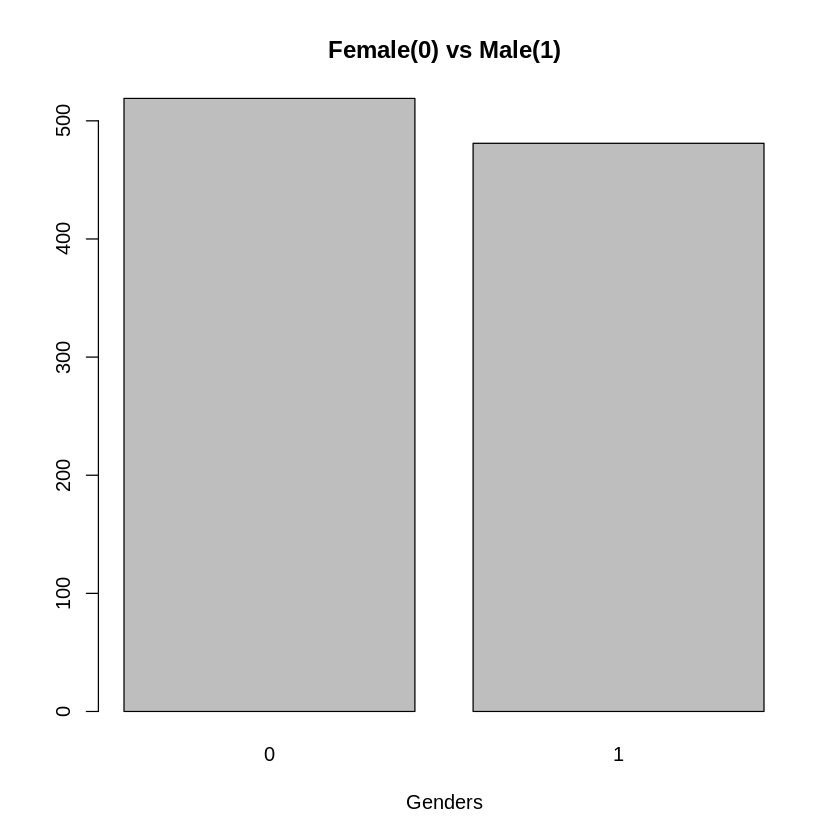

In [ ]:
# check gender count distribution
barplot(table(advertising$Male), main='Female(0) vs Male(1)', xlab='Genders')

We observe that slightly more females than males were sampled in the study.

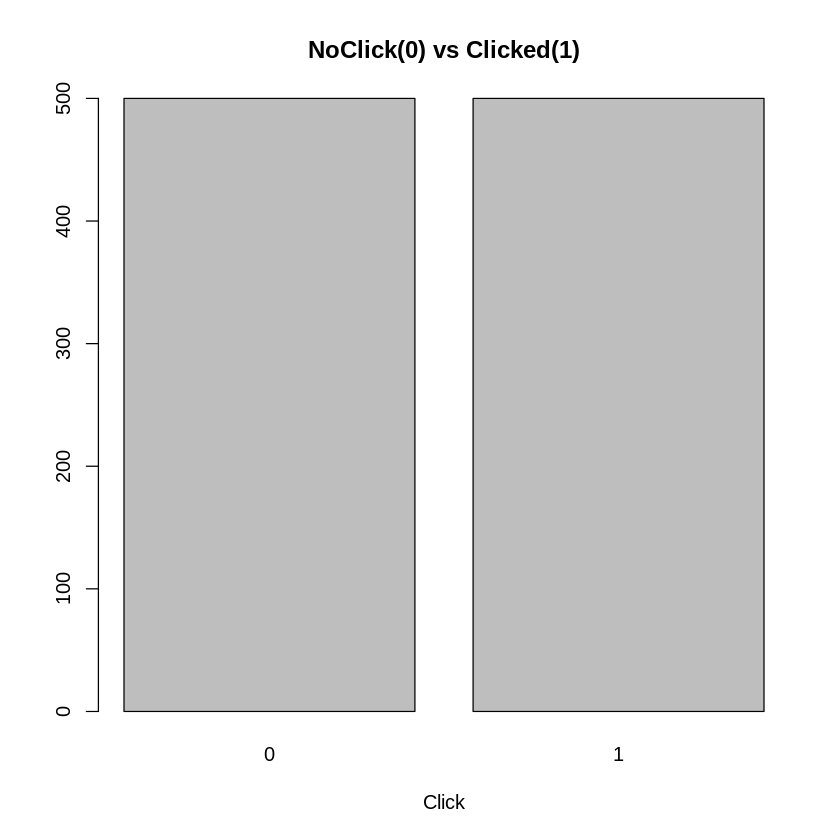

In [ ]:
# check target class distribution
barplot(table(advertising$Clicked), main='NoClick(0) vs Clicked(1)', xlab='Click')

We observe that the target class in the data set is balanced as there is an equal number of clicks and no clicks.

In [ ]:
install.packages('moments') # for checking measures of dispersion

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.4784227

[1] 2.595482

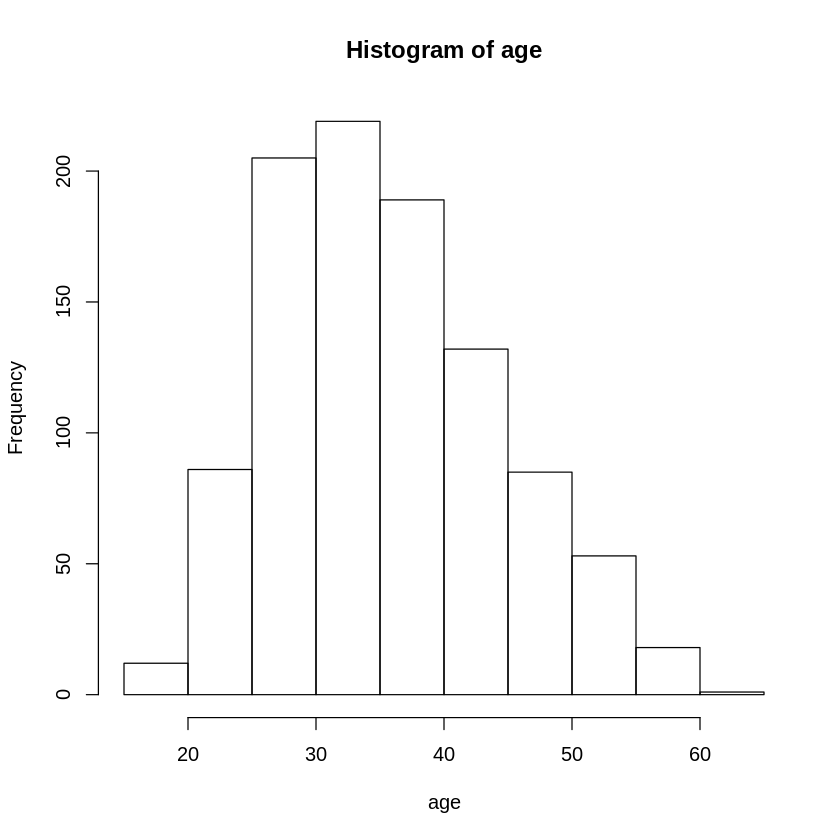

In [ ]:
library(moments) # for measuring skewness and kurtosis

# check age distribution
hist(age)
skewness(age)
kurtosis(age)

From the histogram plot and the skewness value of 0.48, we observe that the it is moderately skewed to the right while a kurtosis value of 2.6 indicates the distribution is platykurtic with a relatvely flat peak.

[1] -0.3712026

[1] 1.903942

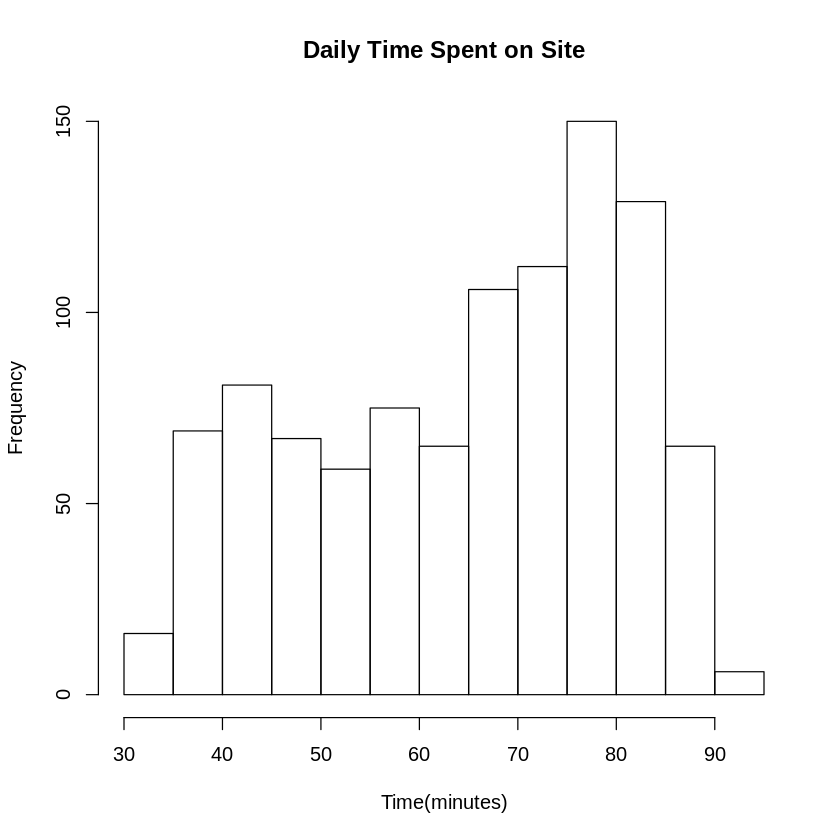

In [ ]:
# check time distribution
hist(daily_time, main='Daily Time Spent on Site', xlab='Time(minutes)')
skewness(daily_time)
kurtosis(daily_time)

From the histogram plot and the skewness value of -0.37, we observe that the it is moderately skewed to the left while a kurtosis value of 1.9 indicates the distribution is platykurtic with a relatvely flat peak.

[1] -0.6493967

[1] 2.894694

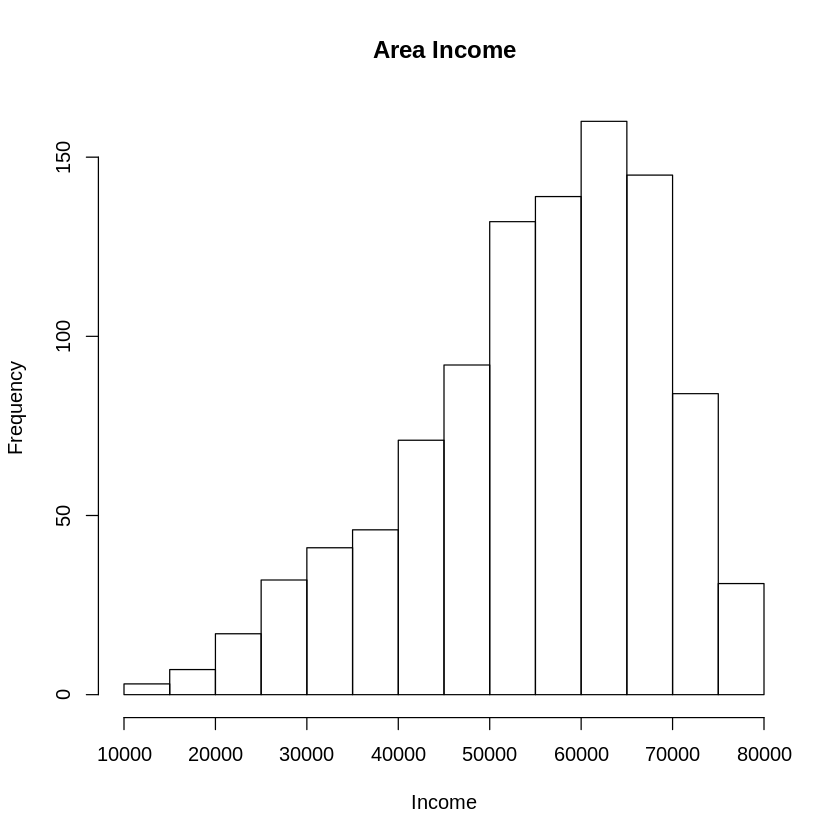

In [ ]:
# check area income distribution
hist(area_income, main='Area Income', xlab='Income')
skewness(area_income)
kurtosis(area_income)

From the histogram plot and the skewness value of -0.65, we observe that the it is moderately skewed to the left while a kurtosis value of 2.89 indicates the distribution is platykurtic with a relatvely flat peak. The threshold for a mesorkurtic(normal) distribution is 3.0 kurtosis. 

[1] -0.03348703

[1] 1.727701

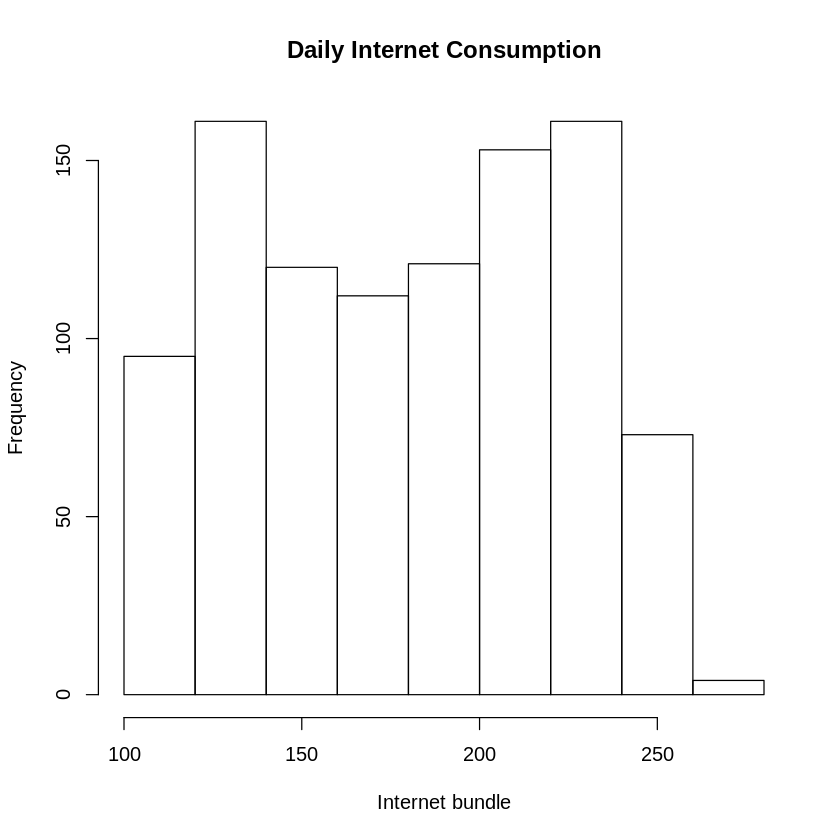

In [ ]:
# check daily internet use distribution
hist(daily_internet, main='Daily Internet Consumption', xlab='Internet bundle')
skewness(daily_internet)
kurtosis(daily_internet)

From the histogram plot and the skewness value of -0.03, we observe that the it is moderately skewed to the left while a kurtosis value of 1.73 indicates the distribution is platykurtic with a relatvely flat peak. 

## Bivariate Analysis

In [ ]:
# assign numeric columns to variables
daily_internet <- advertising$Daily_Internet
area_income <- advertising$Area_Income
daily_time <- advertising$Daily_Time
age <- advertising$Age

In [ ]:
# correlation between daily time spent and age
cor(age, daily_time)

[1] -0.3315133

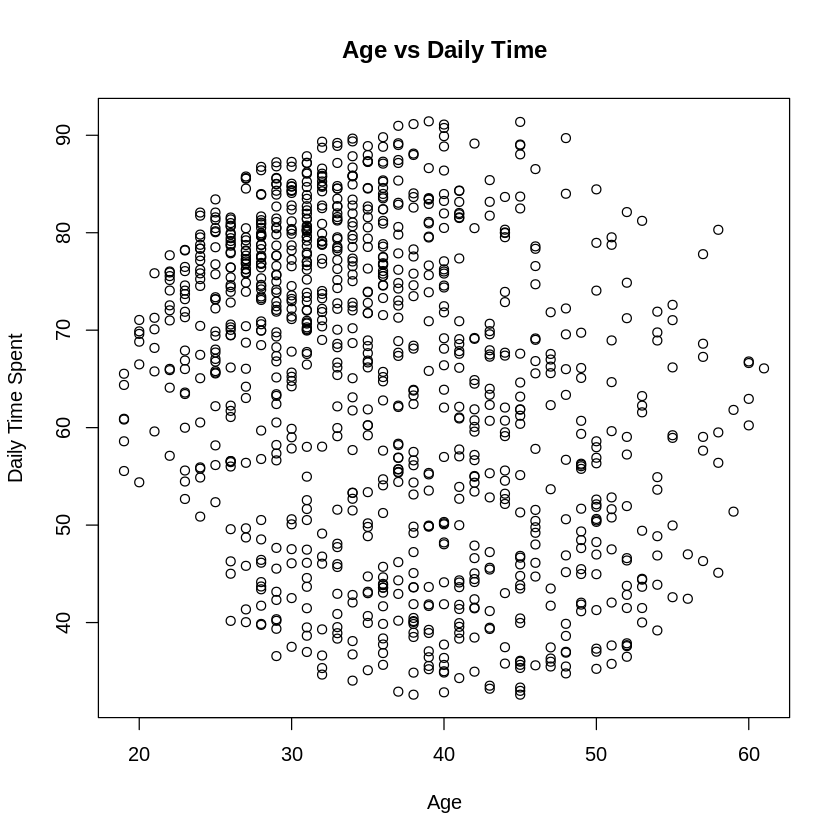

In [ ]:
# plot scatter plot between daily time spent and age
plot(age, daily_time, xlab='Age', ylab='Daily Time Spent', main='Age vs Daily Time')

From the scatter plot and the correlation score, we can observe a weak negative correlation between age and daily time spent on the site as the older a person is the lesser time they spend on the site.

In [ ]:
# correlation between area income and age
cor(area_income, age)

[1] -0.182605

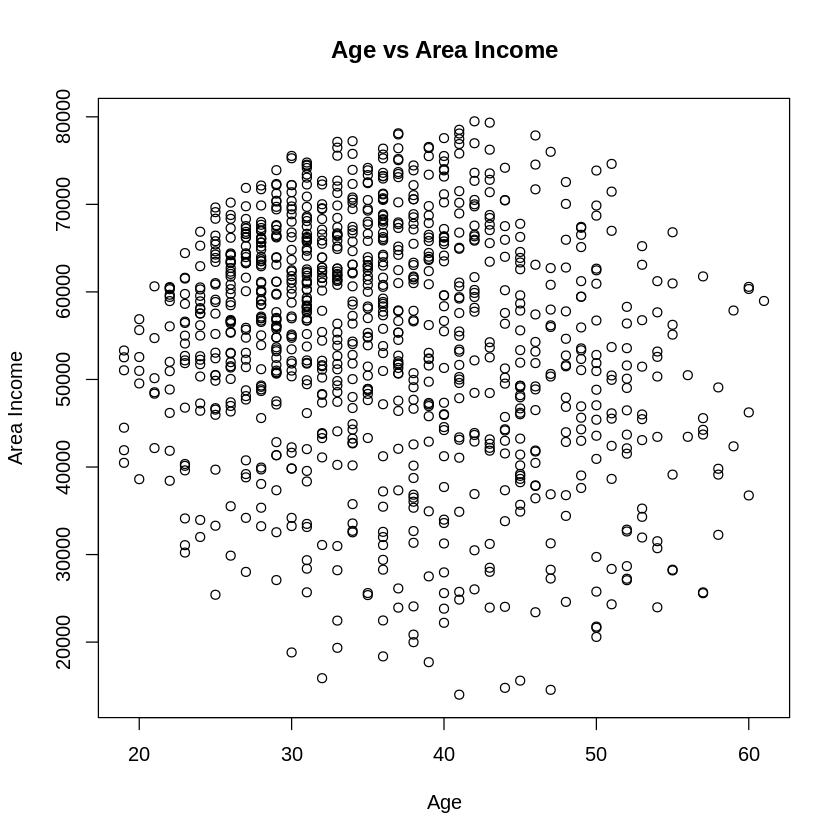

In [ ]:
# plot scatter plot between area income and age
plot(age, area_income, xlab='Age', ylab='Area Income', main='Age vs Area Income')

A correlation score of -0.18 indicates a weak negative correlation between age and area income.

In [ ]:
# correlation between daily internet and age
cor(age, daily_internet)

[1] -0.3672086

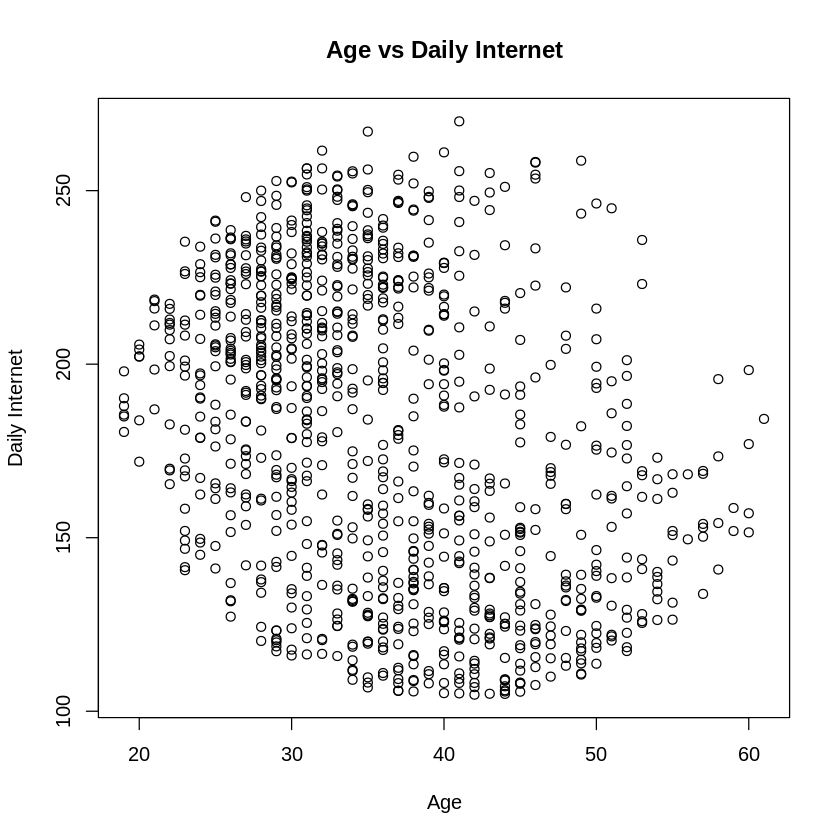

In [ ]:
# plot scatter plot between daily internet and age
plot(age, daily_internet, xlab='Age', ylab='Daily Internet', main='Age vs Daily Internet')

There is an equally weak negative correlation between age and daily internet usage since the older individuals use slightly less internet than their younger counterparts.

In [ ]:
# correlation between daily time spent and daily internet
cor(daily_time, daily_internet)

[1] 0.5186585

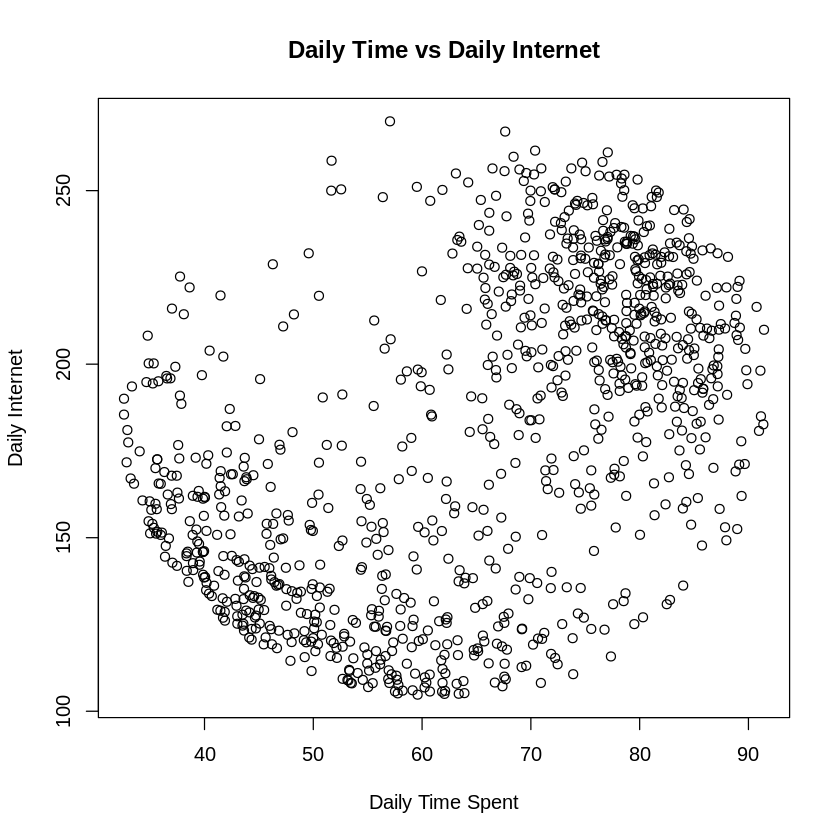

In [ ]:
# plot scatter plot between daily internet and daily time spent
plot(daily_time, daily_internet, xlab='Daily Time Spent', ylab='Daily Internet', main='Daily Time vs Daily Internet')

The scatter plot indicates a strong positive correlation between the daily time spent on the site and the amount of internet used daily. The strong correlation is also evidenced by the correlation score of 0.52.

In [ ]:
# correlation between daily time spent and area income
cor(area_income, daily_time)

[1] 0.3109544

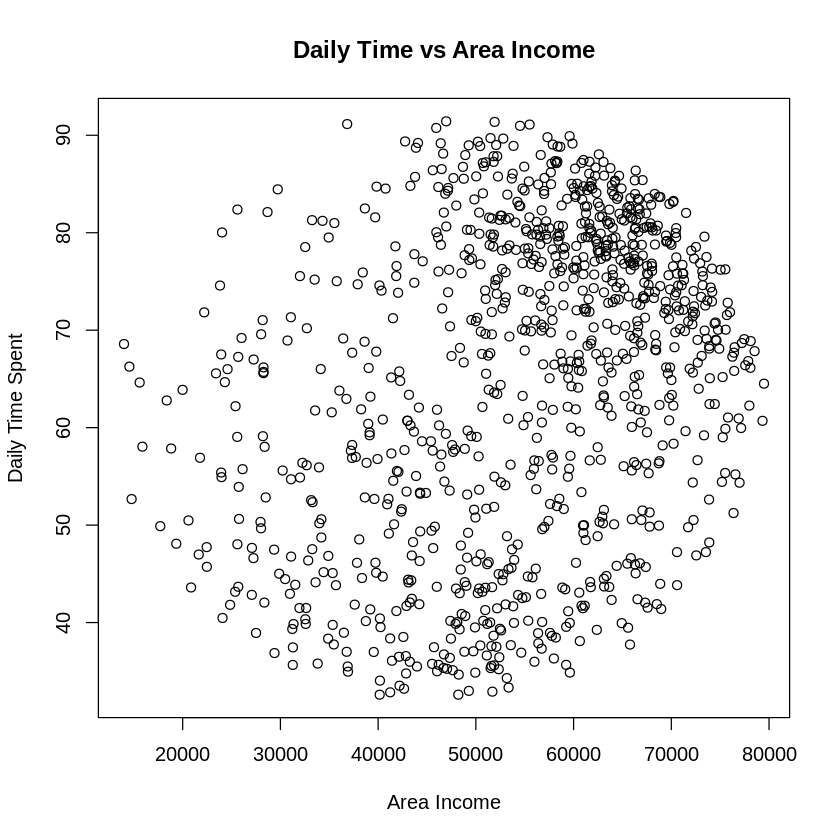

In [ ]:
# plot scatter plot between daily time spent and area income
plot(area_income, daily_time, xlab='Area Income', ylab='Daily Time Spent', main='Daily Time vs Area Income')

A correlation score of 0.31 indicates a weak positive correlation between the area income and the amount of time an individual spent on the site.

In [ ]:
# correlation between daily internet and area income
cor(area_income, daily_internet)

[1] 0.3374955

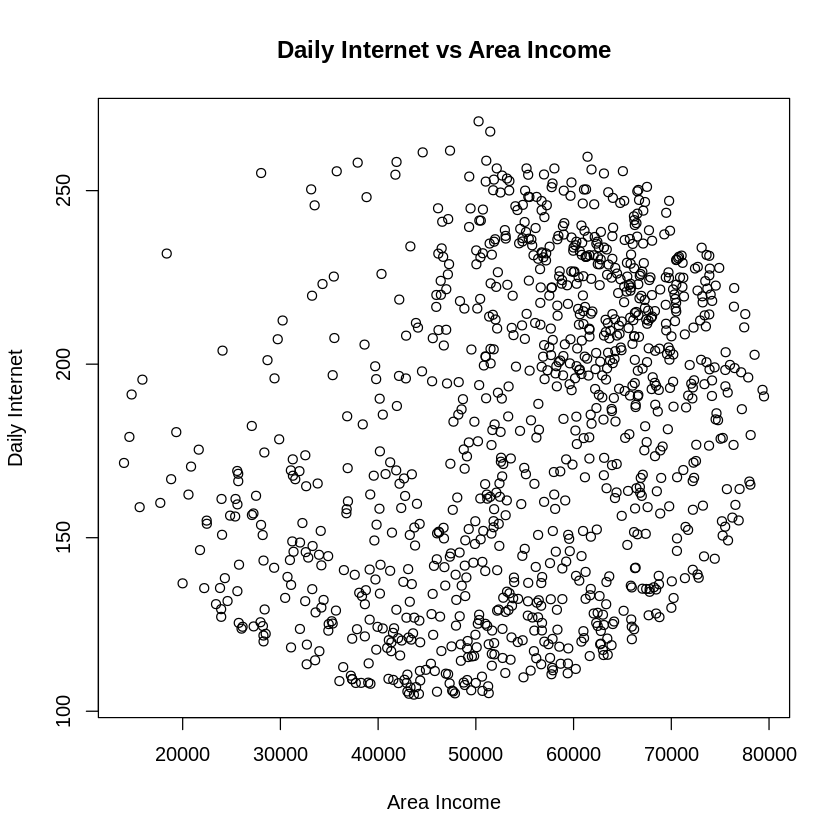

In [ ]:
# plot scatter plot between daily internet and area income
plot(area_income, daily_internet, xlab='Area Income', ylab='Daily Internet', main='Daily Internet vs Area Income')

There is a weak positive correlation between the area income and the daily internet used.

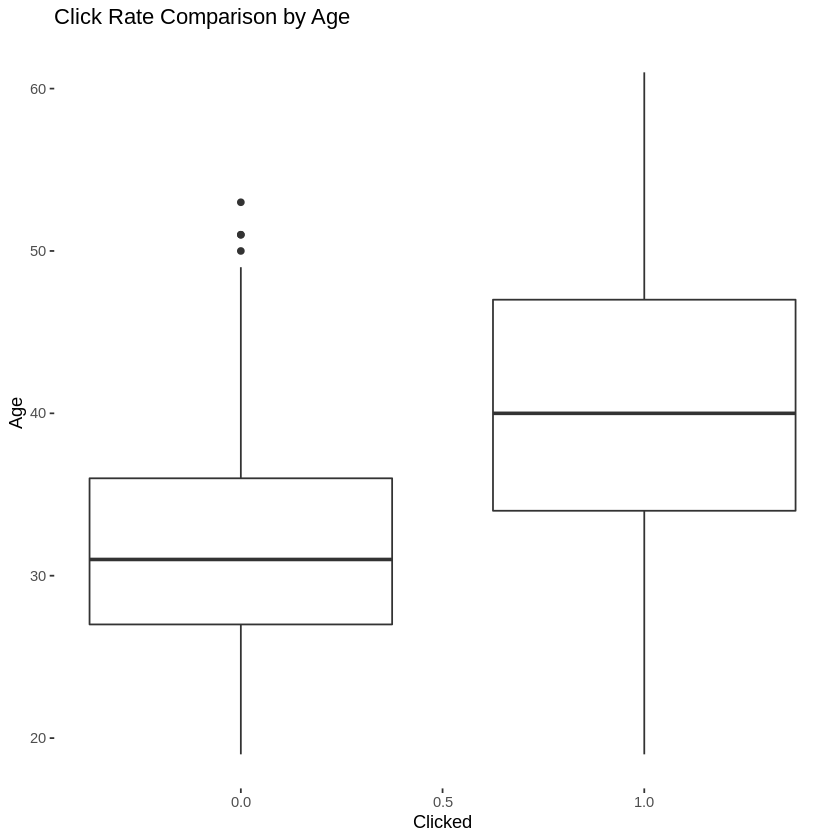

In [ ]:
# compare mean and dispersion of age of individuals who clicked the ad vs those who did not click
ggplot(data = advertising_no_outliers,
  aes(x = Clicked, y = Age, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Age") +
  theme(panel.background = element_rect(fill = "white"))

We can observe that the older a person is, the more likely they are to click the ad. With regards to averages, the average age of a person who clicked the ad is 40 years while the average of one who did not click the ad is 31 years.

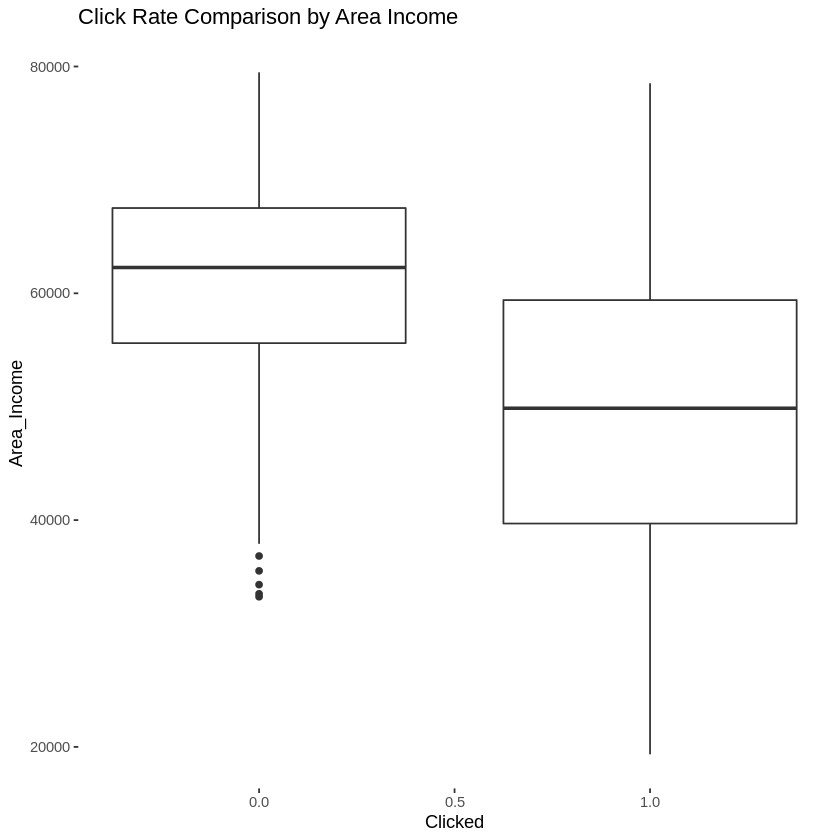

In [ ]:
# compare mean and dispersion of area income of individuals who clicked the ad vs those who did not click
ggplot(data = advertising_no_outliers,
  aes(x = Clicked, y = Area_Income, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Area Income") +
  theme(panel.background = element_rect(fill = "white"))

Comparing area income, individuals who clicked the ad earned less than those who did not click the ad. The mean area income of a person who clikced the ad is approximately 50,000 while that of someone who did not click the ad is approximatley 62,000.

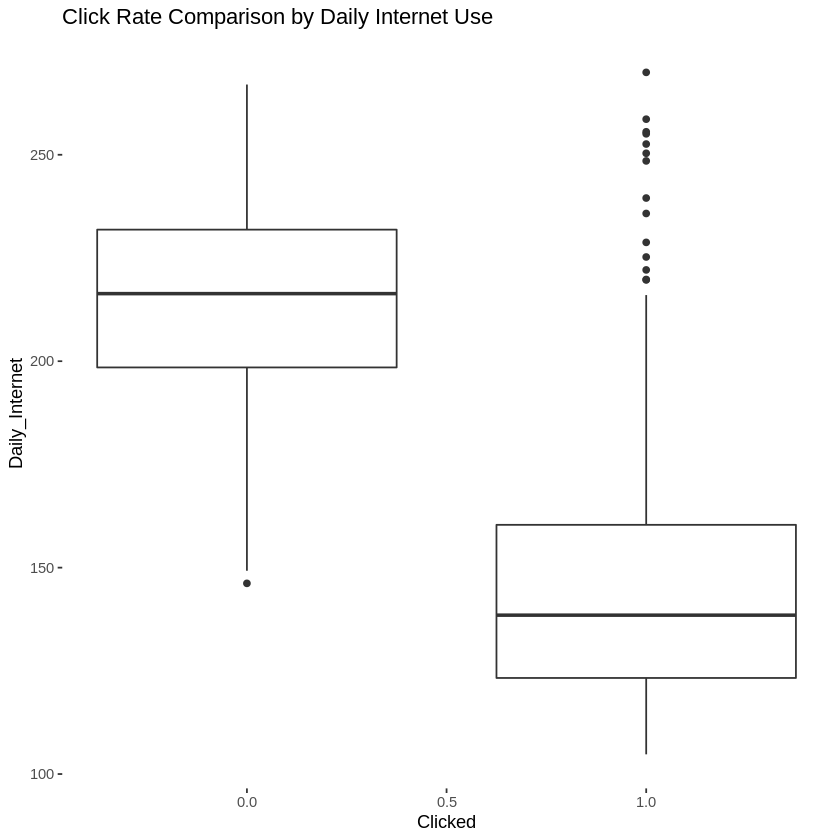

In [ ]:
# compare mean and dispersion of daily internet use of individuals who clicked the ad vs those who did not click
ggplot(data = advertising_no_outliers,
  aes(x = Clicked, y = Daily_Internet, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Daily Internet Use") +
  theme(panel.background = element_rect(fill = "white"))

Comparing the daily internet use patterns, it is evident that individuals who spend more than 160 megabytes of data are less likely to click on an ad compared to individuals who spend less than 160 megabytes. The average internet used by a person who clicked the ad is roughly 140 megabytes while the average internet used by a person who did not click the ad is 220 megabytes.

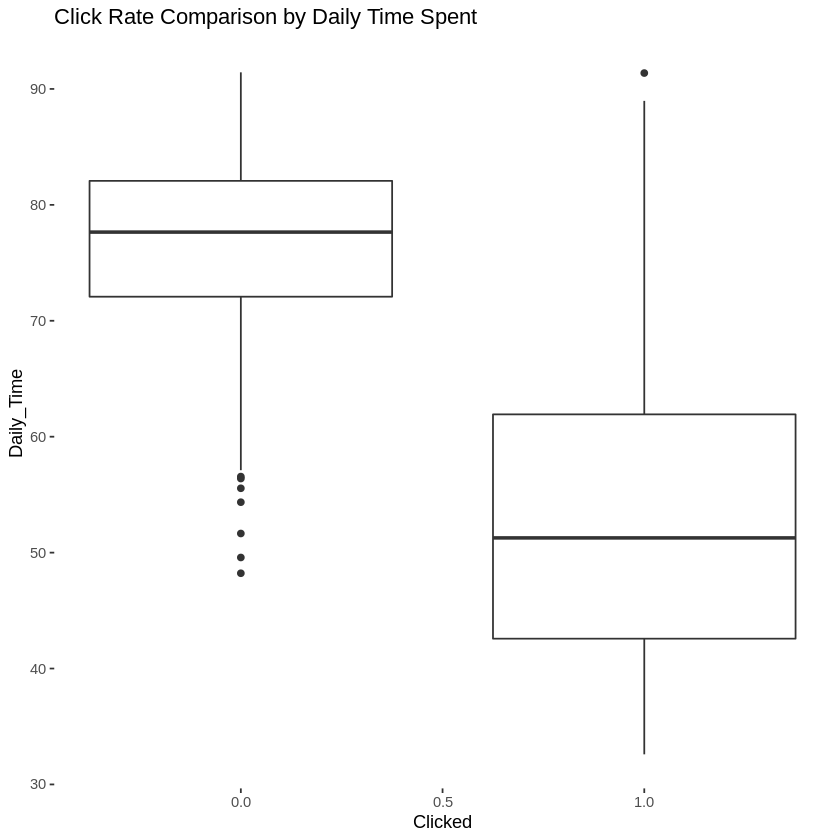

In [ ]:
# compare mean and dispersion of daily time spent of individuals who clicked the ad vs those who did not click
ggplot(data = advertising_no_outliers,
  aes(x = Clicked, y = Daily_Time, group = Clicked)) +
  geom_boxplot() +
  labs(title = "Click Rate Comparison by Daily Time Spent") +
  theme(panel.background = element_rect(fill = "white"))

Like the daily internet usage, individuals who spent less time on the site are more likely to click on the ad than individuals who spend relatively more time on the site. On average, a person who clicked the ad spent 50 minutes on the site while a person who did not spent 77 minutes on the site.

In [ ]:
# distinguish between clicks and no clicks
clicks <- filter(advertising_no_outliers, Clicked == 1)
no_clicks <- filter(advertising_no_outliers, Clicked == 0)

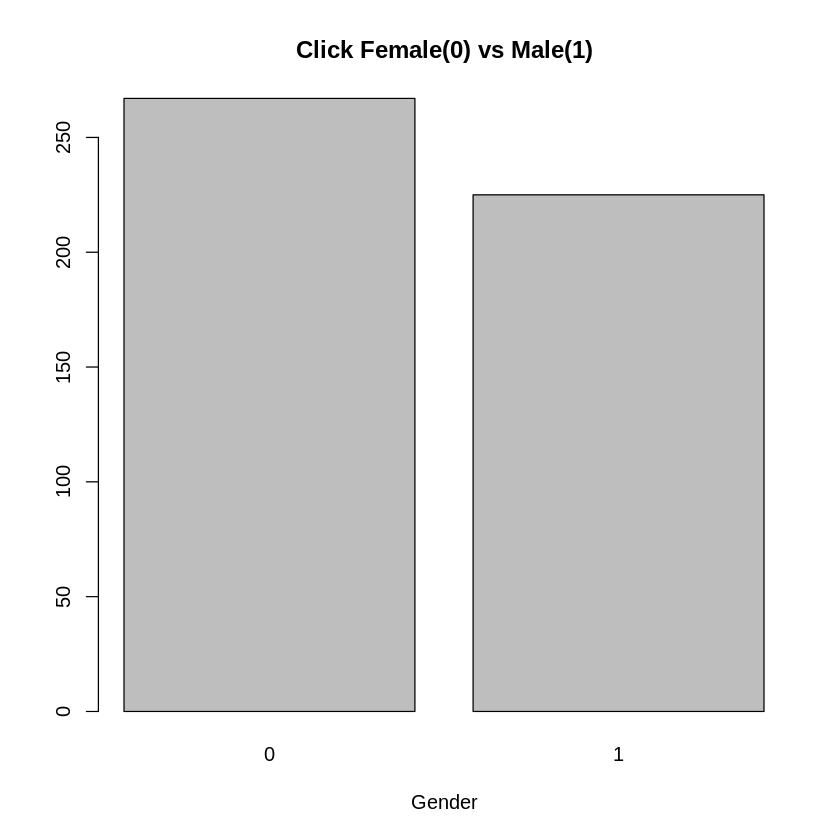

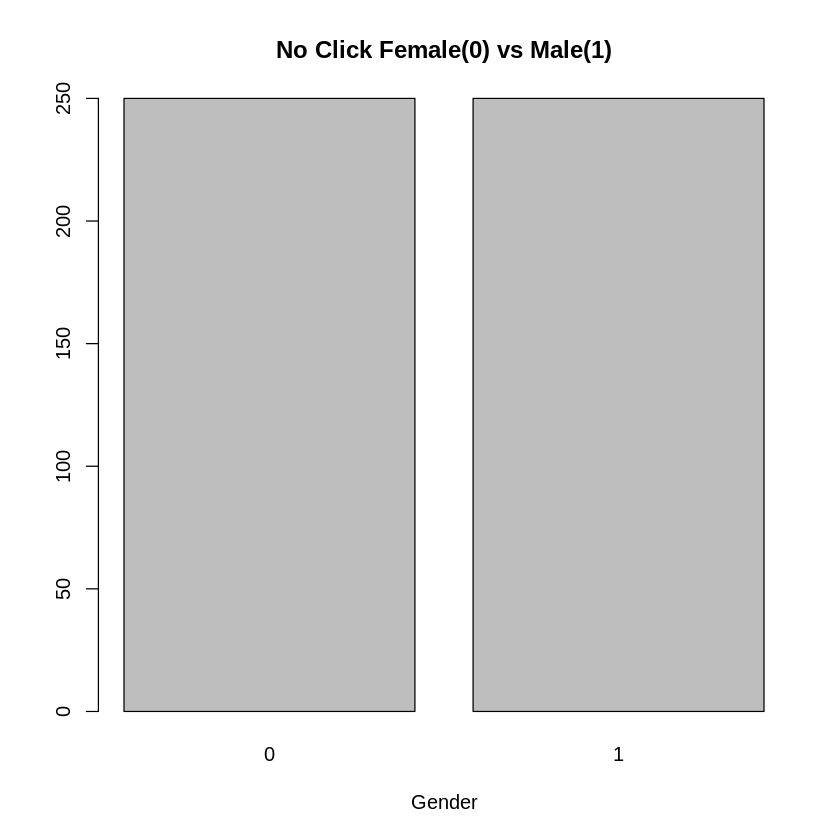

In [ ]:
# comparing click rate across genders
tc <- table(clicks[, 'Male'])
tnc <- table(no_clicks[, 'Male'])

barplot(tc, main='Click Female(0) vs Male(1)', xlab='Gender')
barplot(tnc, main='No Click Female(0) vs Male(1)', xlab='Gender')

The bar charts indicate that more females than males clicked the ad but there is no difference in those who did not click the ad. The fact that equal males and females did not click the ad indicates that gender is a very unlikely determinant of whether a person clicks the ad in this particular case.

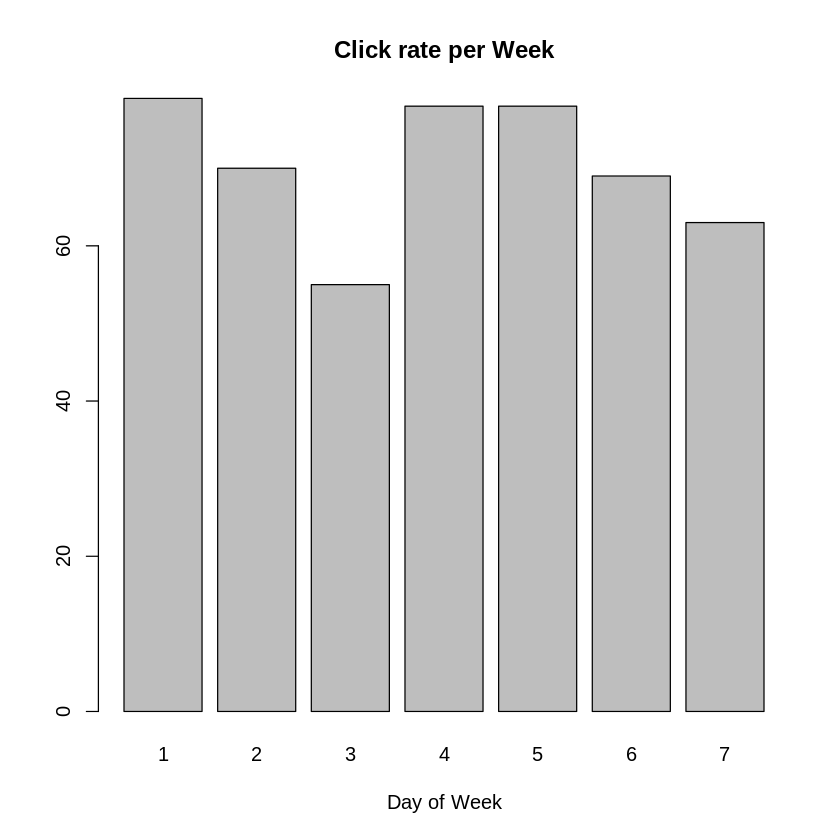

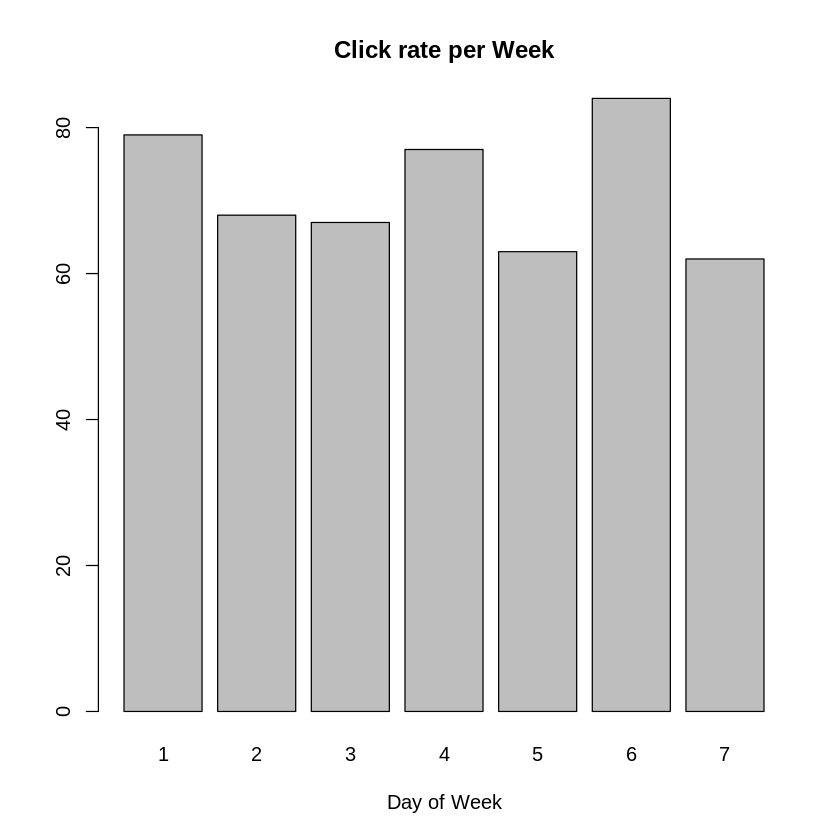

In [ ]:
# Comparing click rates across different days
tc <- table(clicks[, 'Day'])
tnc <- table(no_clicks[, 'Day'])

barplot(tc, main='Click rate per Week', xlab='Day of Week')
barplot(tnc, main='Click rate per Week', xlab='Day of Week')

The bar plots for the click rates across different days indicates very little variation between the day of the week and the likelihood of a person clicking an ad. 

In [ ]:
# get frequency table of country column
country_frequency <- sort(table(clicks$Country), decreasing=T) # sorting to identify 

data.frame(head(country_frequency))

Var1,Freq
<fct>,<int>
Australia,7
Ethiopia,7
Turkey,7
Liberia,6
Liechtenstein,6
South Africa,6


The countries with the highest click rates were Australia, Ethiopia, Turkey, Liberia, Liechtenstein, and South Africa.

In [ ]:
# get frequency table of country column
country_frequency <- sort(table(no_clicks$Country), decreasing=T) # sorting to identify 

data.frame(head(country_frequency))

Var1,Freq
<fct>,<int>
Bolivia,6
Croatia,6
Gabon,6
Burundi,5
Cambodia,5
Cameroon,5


The countries with the lowest click rates were Bolivia, Croatia, Gabon, Burindi, Cambodia, and Cameroon.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



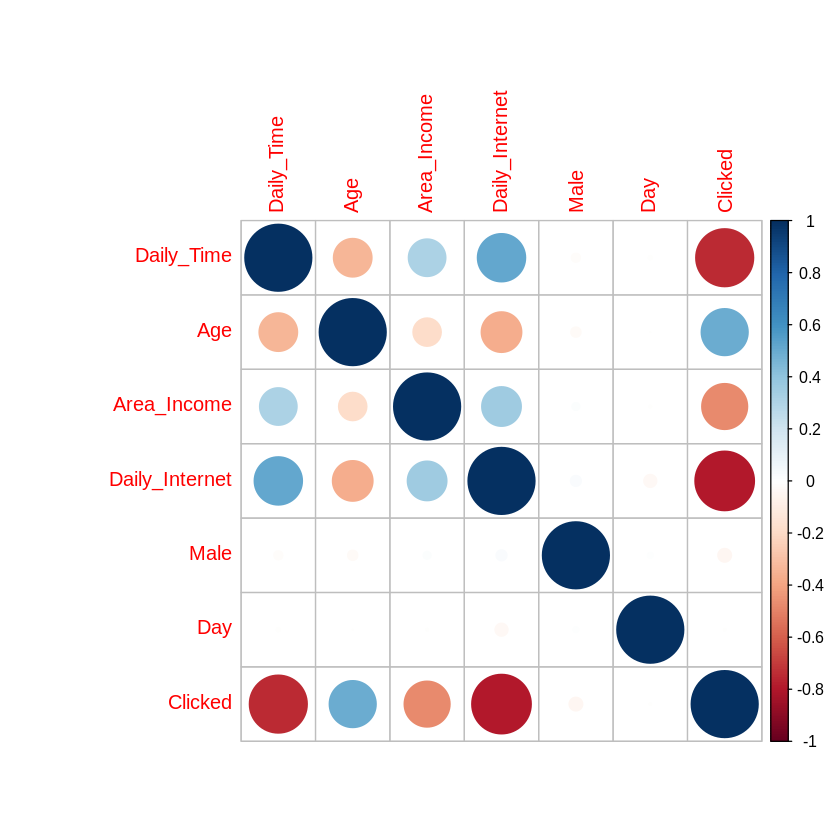

In [ ]:
install.packages("corrplot") # install corrplot package
library(corrplot)

#select appropriate columns
selected_cols <- advertising_no_outliers %>% select('Daily_Time', 'Age', 'Area_Income', 'Daily_Internet', 'Male', 'Day', 'Clicked')
mydata.cor = cor(selected_cols)

corrplot(mydata.cor) # plot correlation matrix

Based on the correlation matrix, we observe that the action of whether a person click is negatvely correlated with amount of time they spend online and the amount of daily internet used. On the other hand, a person's age is positively correlated with the likelihood of clicking on an ad. There also seems to be no correlation whatsoever between a person's gender and the day of the week.

## Modelling

In [ ]:
# Implementing Decision Trees
head(advertising_no_outliers)

# select rows to work with
selected <- advertising_no_outliers[, c(1:4, 7, 11, 10)]
selected$Clicked = factor(selected$Clicked)


Daily_Time,Age,Area_Income,Daily_Internet,Ad_Topic,City,Male,Country,Timestamp,Clicked,Day
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,5


In [ ]:
# create training and testing data
set.seed(2)
train = sample(1:nrow(selected), nrow(selected)/2) # split the data set into train and test 50/50
test = -train

training_data = selected[train,]
testing_data = selected[test, ]
testing_click = selected$Clicked[test] # assign true values of whether an ad was clicked for model evaluation

In [ ]:
# Preview training data
head(training_data)

Daily_Time,Age,Area_Income,Daily_Internet,Male,Day,Clicked
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
83.17,43,54251.78,244.40,1,3,0
54.37,38,72196.29,140.77,0,7,1
71.27,21,50147.72,216.03,1,2,0
67.85,41,78520.99,202.70,1,5,1
71.03,32,57846.68,120.85,0,4,1
80.51,28,64008.55,200.28,1,6,0


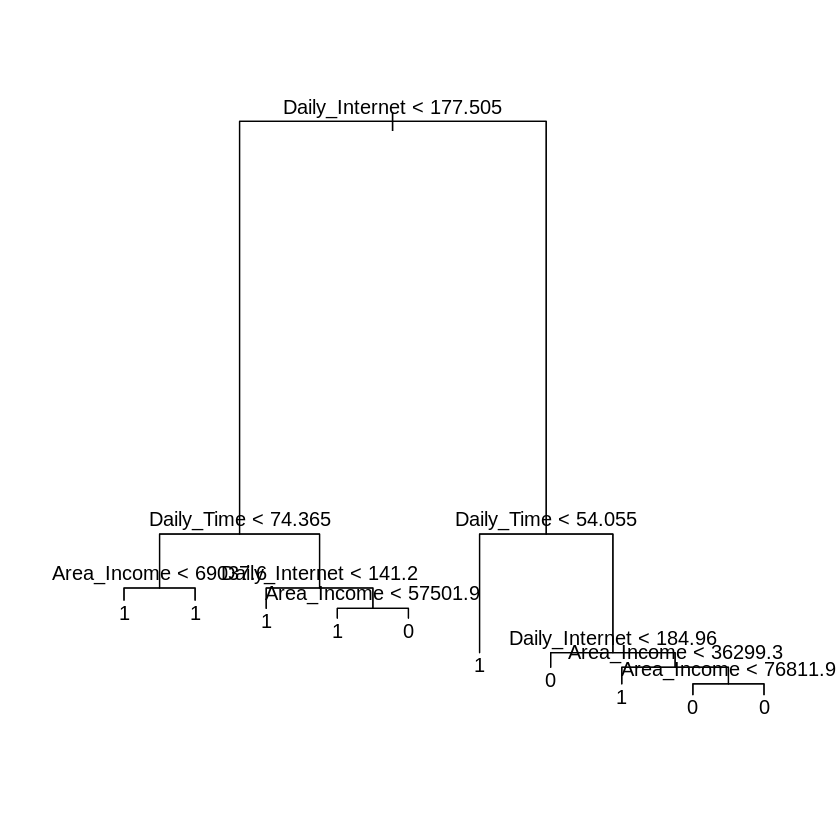

In [ ]:
# fit the decision tree
# install.packages('tree')
library(tree)
tree_model = tree(Clicked~., training_data)
plot(tree_model)
text(tree_model, pretty = 0)

In [ ]:
tree_pred = predict(tree_model, testing_data, type = 'class')
mean(tree_pred != testing_click)

[1] 0.05846774

The error rate for our model is 0.05 which is a very good model.

In [ ]:
# perform cross validation
set.seed(2)
cv_tree = cv.tree(tree_model, FUN = prune.misclass)
names(cv_tree)

[1] "size"   "dev"    "k"      "method"

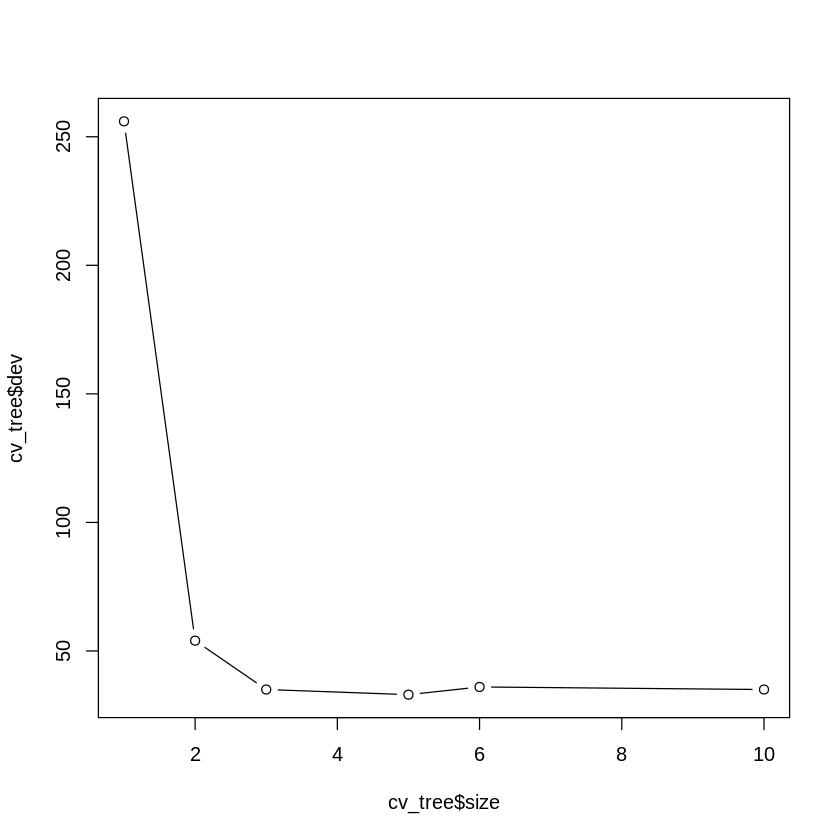

In [ ]:
# check optimal tree size
plot(cv_tree$size, cv_tree$dev, type = 'b')

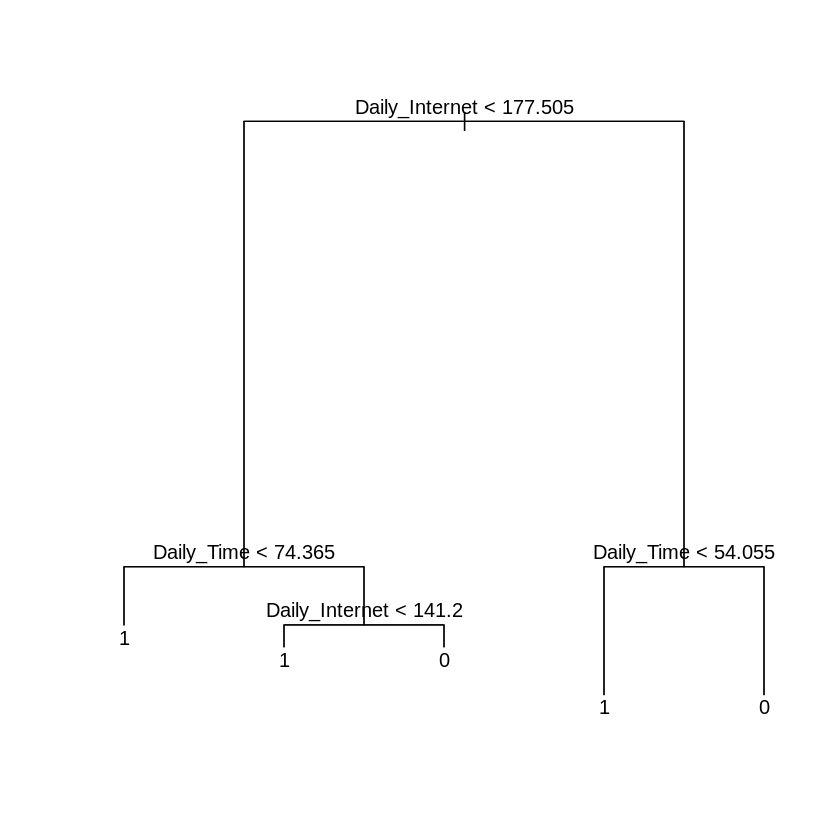

In [ ]:
# prune the tree
pruned_model = prune.misclass(tree_model, best = 5)
plot(pruned_model)
text(pruned_model, pretty = 0)

In [ ]:
# check performance
tree_pred = predict(pruned_model, testing_data, type='class')
mean(tree_pred != testing_click)

[1] 0.06048387

After pruning the tree, the error rate of the model is 0.06 which is higher than the previous value. However, pruning has improved the explainability of our model.

## Summary and Recommendations.

This project entailed performing data analysis to establish an understanding of the factors that determine the success of a particular advertising campaign. The mestric of success that were set for the project were all accomplished as I was able to dtermine the measures of central tendency, measures of dispersion, while examine the relationshi between different variables. In an analysis of the different variables, I established that the variables with the highest correlation with whether a person clicked an ad were the 'daily internet use', 'daily time spent on the site' and 'are income' which were negatively correlated. The age variable was positively correlated with whether a person clicked an ad. Additionally, I identifed the countries where the advertisement is most likely to be clicked while factors such as gender and day had no meaningful impact on the target variable.

As a recommendation for the cryptography ad, I would recommend that the campaign prioritizes Australia, Ethiopia, Turkey, Liberia, Liechtenstein, and South Africa as they had the highest click rate. Additionally, the campaign should target older people who are between 35 and 45 as they have the highest likelihood of clicking the ad. The campaign should also target individual whose area income ranges between 60,000 and 40,000 as they are the most likely to click the ad. Since time spent and daily internet are key factors, the campaign should target individuals that spend less than 160 mega bytes and spend between 40minutes and 1 hour on the site.


## Challenging the Solution
I am of the opinion that the time of day a person visits a website is likely to impact whether or not they click an ad. I also believe that the ad topic be summarised to provide more understanding about the nature of the particular ad which could inform why certain people clicked while others did not click. ALthough I struggled to implement each of these appraches, I believe they caould also provide insight on the success rate of an ad campaign.